# SMS Spam Classifier <br>
<h3>Abstract</h3><br>
A basic NLP classification task to classify between spam and ham on a given SMS spam dataset of 5,574 messages. <br>

- The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

- The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

In [1]:
## Importing the essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

## Importing the data csv file and Data preprocessing

In [2]:
emails = pd.read_csv('emails.csv')
emails.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
print (f"There are {emails.shape[0]} rows and {emails.shape[1]} columns.")

There are 5728 rows and 2 columns.


In [4]:
# Calculating the length of each emails/ rows and storing it on the new feature 'length'
emails['length'] = emails['text'].apply(len)
emails.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [5]:
# Removing punctuation
import string 
from nltk.corpus import stopwords

In [6]:
def remove_punct_stopwords(message):
    form_str = [char for char in message if char not in string.punctuation]
    form_str_join = ''.join(form_str)
    # including subject also in the stopwords list
    words_stop = stopwords.words('english')
    words_stop.append('subject')
    form_str_stop = [word for word in form_str_join.split() if word.lower() not in words_stop]
    return form_str_stop

In [7]:
emails['text'] = emails['text'].apply(remove_punct_stopwords)

## Exploratory Data Analysis

In [8]:
emails['length'].describe()

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: length, dtype: float64

In [9]:
ham_percent = (emails['spam'].value_counts()/emails.shape[0]*100)[0]
print (f'In the dataset, {ham_percent:.2f}% of the emails are ham, while the rest {(100 - ham_percent):.2f}% of the emails are labelled as spam.')

In the dataset, 76.12% of the emails are ham, while the rest 23.88% of the emails are labelled as spam.


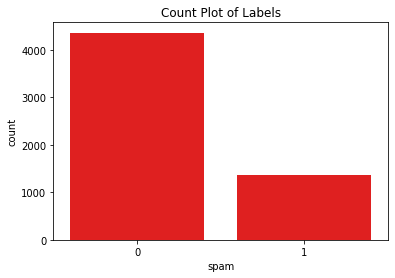

In [10]:
plt.title('Count Plot of Labels')
sns.countplot(emails['spam'], color='r');

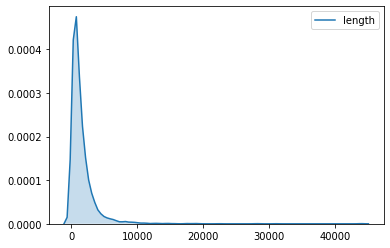

In [11]:
# Exploring the 'length' feature
sns.kdeplot(emails['length'], shade=True);

In [12]:
# Dividing it into 'spam' and 'ham'
spam = emails[emails['spam']==1]
ham = emails[emails['spam']==0]

In [13]:
spam.head()

,text,spam,length
0,"[naturally, irresistible, corporate, identity,...",1,1484
1,"[stock, trading, gunslinger, fanny, merrill, m...",1,598
2,"[unbelievable, new, homes, made, easy, im, wan...",1,448
3,"[4, color, printing, special, request, additio...",1,500
4,"[money, get, software, cds, software, compatib...",1,235


In [14]:
ham.head()

,text,spam,length
1368,"[hello, guys, bugging, completed, questionnair...",0,1188
1369,"[sacramento, weather, station, fyi, forwarded,...",0,1997
1370,"[enron, india, newsdesk, jan, 18, th, newsclip...",0,7902
1371,"[powerisk, 2001, invitation, angelika, thanks,...",0,3644
1372,"[resco, database, customer, capture, steve, kr...",0,5535


In [15]:
# Exploring the spam dataset
spam['length'].describe()

count     1368.000000
mean      1317.257310
std       2271.372893
min         18.000000
25%        401.500000
50%        693.500000
75%       1250.250000
max      28432.000000
Name: length, dtype: float64

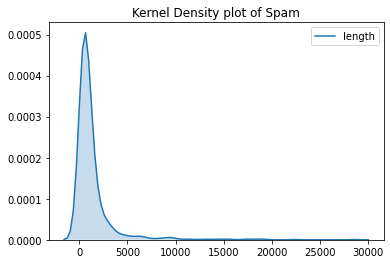

In [16]:
plt.title('Kernel Density plot of Spam')
sns.kdeplot(spam['length'],shade=True);

In [17]:
# Getting the spam email with the largest length
print (spam[spam['length']==max(spam['length'])].text.iloc[0])

, 'commissions', 'sales', 'made', 'people', 'introduce', 'business', 'residual', 'income', 'secret', 'wealthy', 'means', 'investing', 'time', 'money', 'getting', 'paid', 'network', 'marketing', 'also', 'means', 'getting', 'paid', 'work', 'others', 'enclosed', 'information', 'something', 'almost', 'let', 'slip', 'fingers', 'fortunately', 'sometime', 'later', 'reread', 'everything', 'gave', 'thought', 'study', 'name', 'jonathan', 'rourke', 'two', 'years', 'ago', 'corporation', 'worked', 'past', 'twelve', 'years', 'sized', 'position', 'eliminated', 'unproductive', 'job', 'interviews', 'decided', 'open', 'business', 'past', 'year', 'incurred', 'many', 'unforeseen', 'financial', 'problems', 'owed', 'family', 'friends', 'creditors', '35', '000', 'economy', 'taking', 'toll', 'business', 'seem', 'make', 'ends', 'meet', 'refinance', 'borrow', 'home', 'support', 'family', 'struggling', 'business', 'moment', 'something', 'significant', 'happened', 'life', 'writing', 'share', 'experience', 'hopes'

In [18]:
# Exploring the ham dataset
ham['length'].describe()

count     4360.000000
mean      1631.918119
std       1959.664549
min         13.000000
25%        577.750000
50%       1122.000000
75%       2037.250000
max      43952.000000
Name: length, dtype: float64

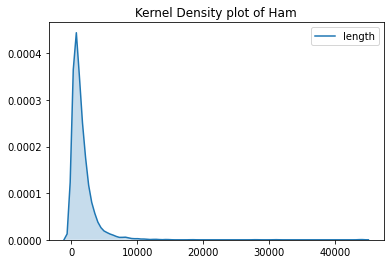

In [19]:
plt.title('Kernel Density plot of Ham')
sns.kdeplot(ham['length'],shade=True);

In [20]:
# Getting the ham email with the largest length
print (ham[ham['length']==max(ham['length'])].text.iloc[0])

 'held', 'london', 'yesterday', 'mseb', 'interested', 'party', 'allowed', 'vote', 'made', 'presentation', 'clarifying', 'stand', 'matter', 'senior', 'state', 'government', 'official', 'said', 'resolution', 'authorise', 'management', 'issue', 'termination', 'notice', 'carried', 'six', 'votes', 'one', 'idbi', 'voted', 'decision', 'official', 'said', 'serving', 'preliminary', 'termination', 'notice', 'lead', 'six', 'month', 'suspension', 'period', 'according', 'clause', '17', '8', 'termination', 'procedure', 'ppa', 'following', 'giving', 'preliminary', 'termination', 'notice', 'parties', 'shall', 'consult', 'period', 'six', 'months', 'longer', 'period', 'may', 'agree', 'step', 'shall', 'taken', 'view', 'mitigating', 'consequences', 'relevant', 'event', 'regard', 'circumstances', 'idbi', 'state', 'bank', 'india', 'principal', 'indian', 'lenders', 'earlier', 'persuaded', 'overseas', 'lenders', 'hold', 'consent', 'termination', 'notice', 'time', 'least', 'one', 'lender', 'consent', 'company'

In [21]:
# 